**Title:**
Analyzing Heart Data from Cleveland to Predict the Possibility of Heart Disease Based on Maximum Heart Rate Achieved , Age and Serum Cholesterol

**Introduction:**
Heart health is interconnected to the maximum heart rate an individual can achieve changes with age. It was observed by the American Journal of Cardiology that any type of angina (chest pain) was observed to have a 30% increase with the increase of age (Perret-Guillaume et al., 2009; Pepine et al., 1994). Further, a study conducted by the NIH found that a lower maximum heart rate achieved was associated with a higher risk of dying from heart disease (Sandvik et al., 1995). Besides, research indicates that the decreasing incidence of ischaemic heart disease among different ages is related to the decreasing serum cholesterol concentration (Law et al., 1994). 
In this project, we will investigate the predictability of diagnosis of heart diseases based on the maximum heart rate achieved, age and serum cholesterol from the Cleveland heart disease database.

**Preliminary Exploratory Data Analysis:**
Read in the csv file, processed.cleveland.data from the web. Firstly, add headers to the columns.


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland <- read_csv(url, col_names = FALSE)
#add headers
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                         "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
head(cleveland)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Filter rows with missing values indicated by “?” out. Then mutate the data to make the data more readable and select the age, maximum heart rate achieved, serum cholesterol and diagnosis of heart disease columns.

In [3]:
# tidying the data
# removing rows which have NA values that are indicated by ?
cleveland_no_missing <- cleveland |>
    filter(age != '?', sex != '?', cp != '?', trestbps != '?', chol != '?', 
           fbs != '?', restecg != '?', thalach != '?', exang != '?', 
           oldpeak != '?', slope != '?', ca != '?', thal != '?', num != '?') |>
    na.omit()

# mutate the numbers into strings
cleveland_mutated <- cleveland_no_missing |>
    mutate(diagnosis = (if_else(num == 0, "not diagnosed", "diagnosed"))) 

# selecting the columns which we will be using in our analysis
cleveland_selected <- cleveland_mutated |>
    select(diagnosis, age, chol, thalach) 

split into a training set which makes up 75% of the set and a testing set which makes up the remaining 25%.

In [4]:
set.seed(1234)
# splitting the dataset into training set and testing set, produce the training set table
cleveland_split <- initial_split(cleveland_selected, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

head(cleveland_train)


diagnosis,age,chol,thalach
<chr>,<dbl>,<dbl>,<dbl>
diagnosed,67,286,108
diagnosed,67,229,129
diagnosed,62,268,160
diagnosed,63,254,147
diagnosed,53,203,155
diagnosed,56,256,142


Making a scatter plot to see the relationship between the maximum heart rate and age of an individual, we can see the division between diagnosed individuals and not diagnosed individuals almost in 2 clusters. 

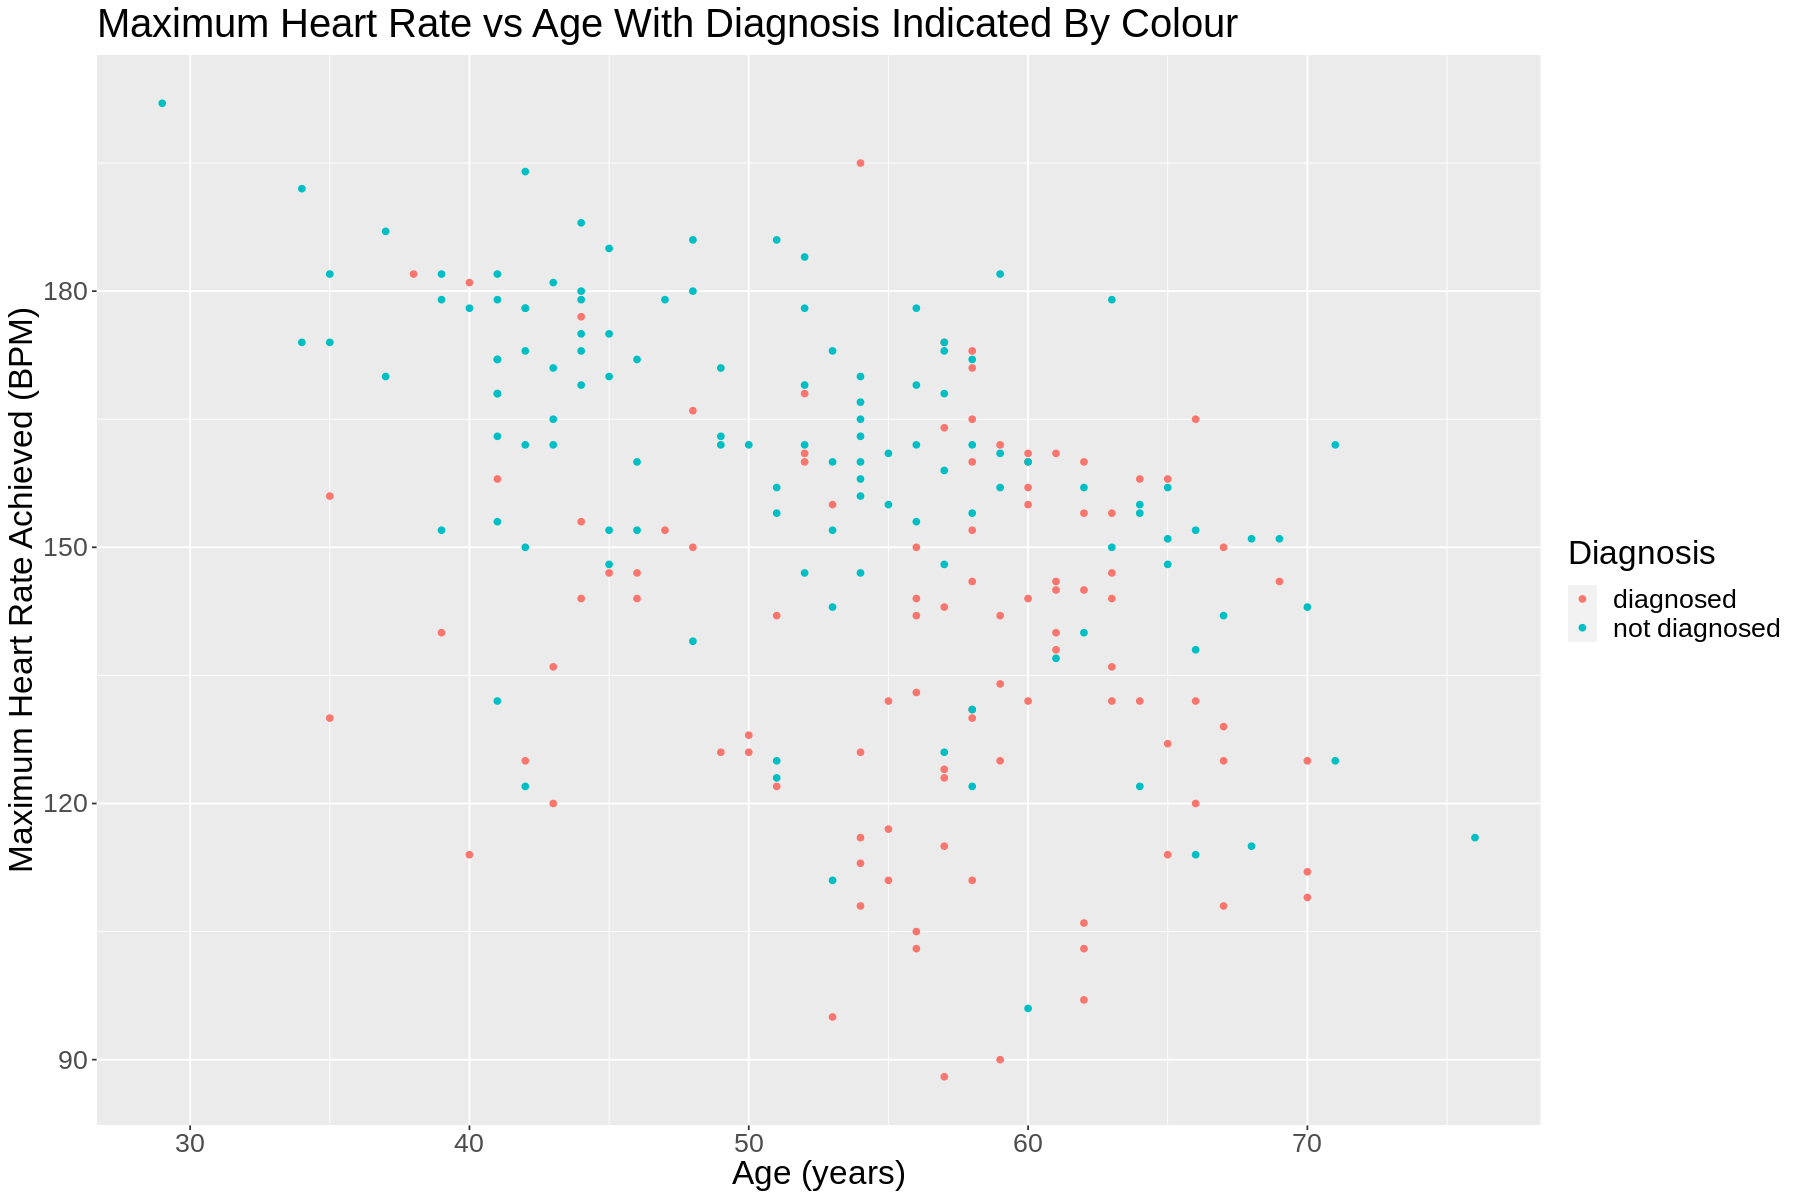

In [5]:
options(repr.plot.width=15, repr.plot.height=10)
# produce scatter plot from training set
heart_rate_scatter <- cleveland_train |>
    ggplot(aes(x = age, y = thalach)) +
    geom_point(aes(color = diagnosis)) +
    labs(x = "Age (years)", y = "Maximum Heart Rate Achieved (BPM)",
         color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    ggtitle("Maximum Heart Rate vs Age With Diagnosis Indicated By Colour")

heart_rate_scatter

Making a plot to see the relationship between the serum cholesterol concentration and age of an individual, there's a weak division between diagnosed individuals and individuals that aren't diagnosed. 

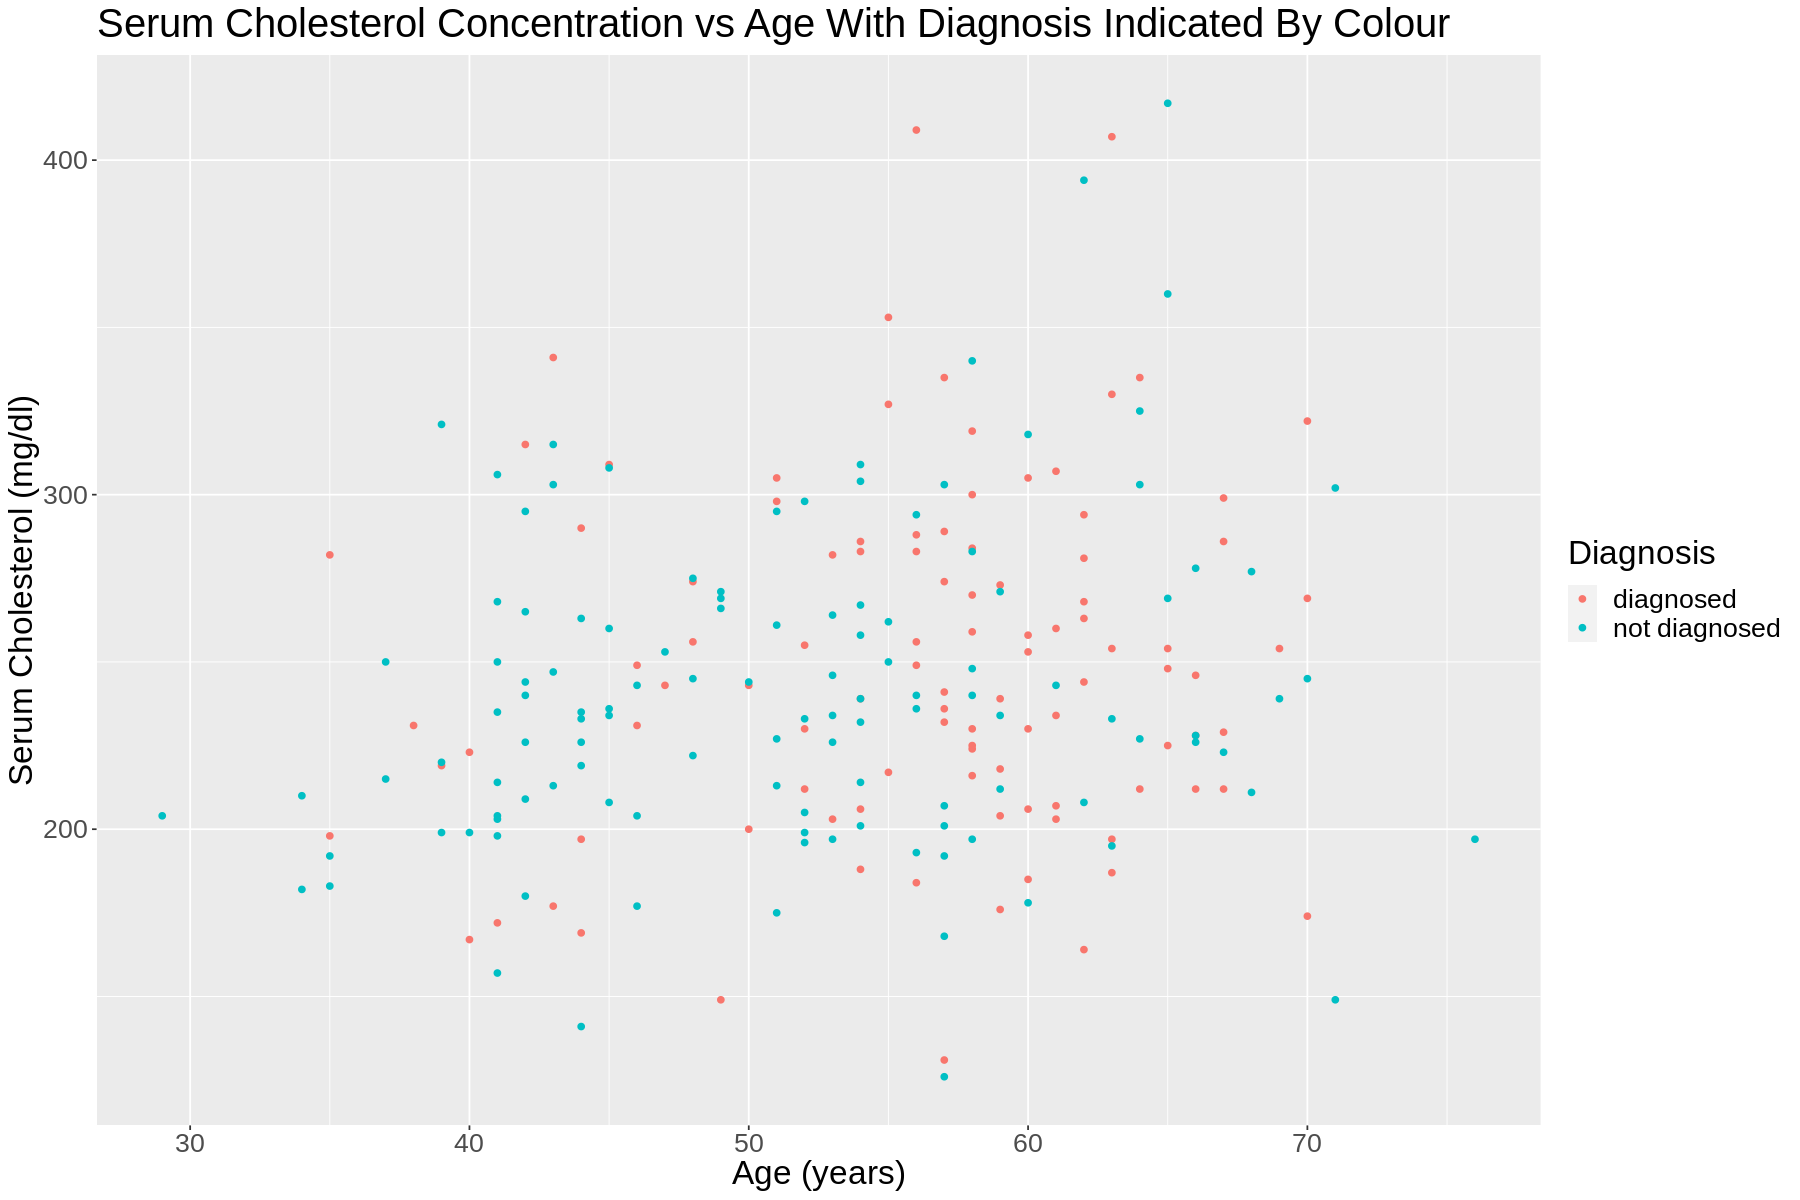

In [6]:
serum_cholesterol_scatter <- cleveland_train |>
    ggplot(aes(x = age, y = chol)) +
    geom_point(aes(color = diagnosis)) +
    labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)",
         color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    ggtitle("Serum Cholesterol Concentration vs Age With Diagnosis Indicated By Colour")

serum_cholesterol_scatter

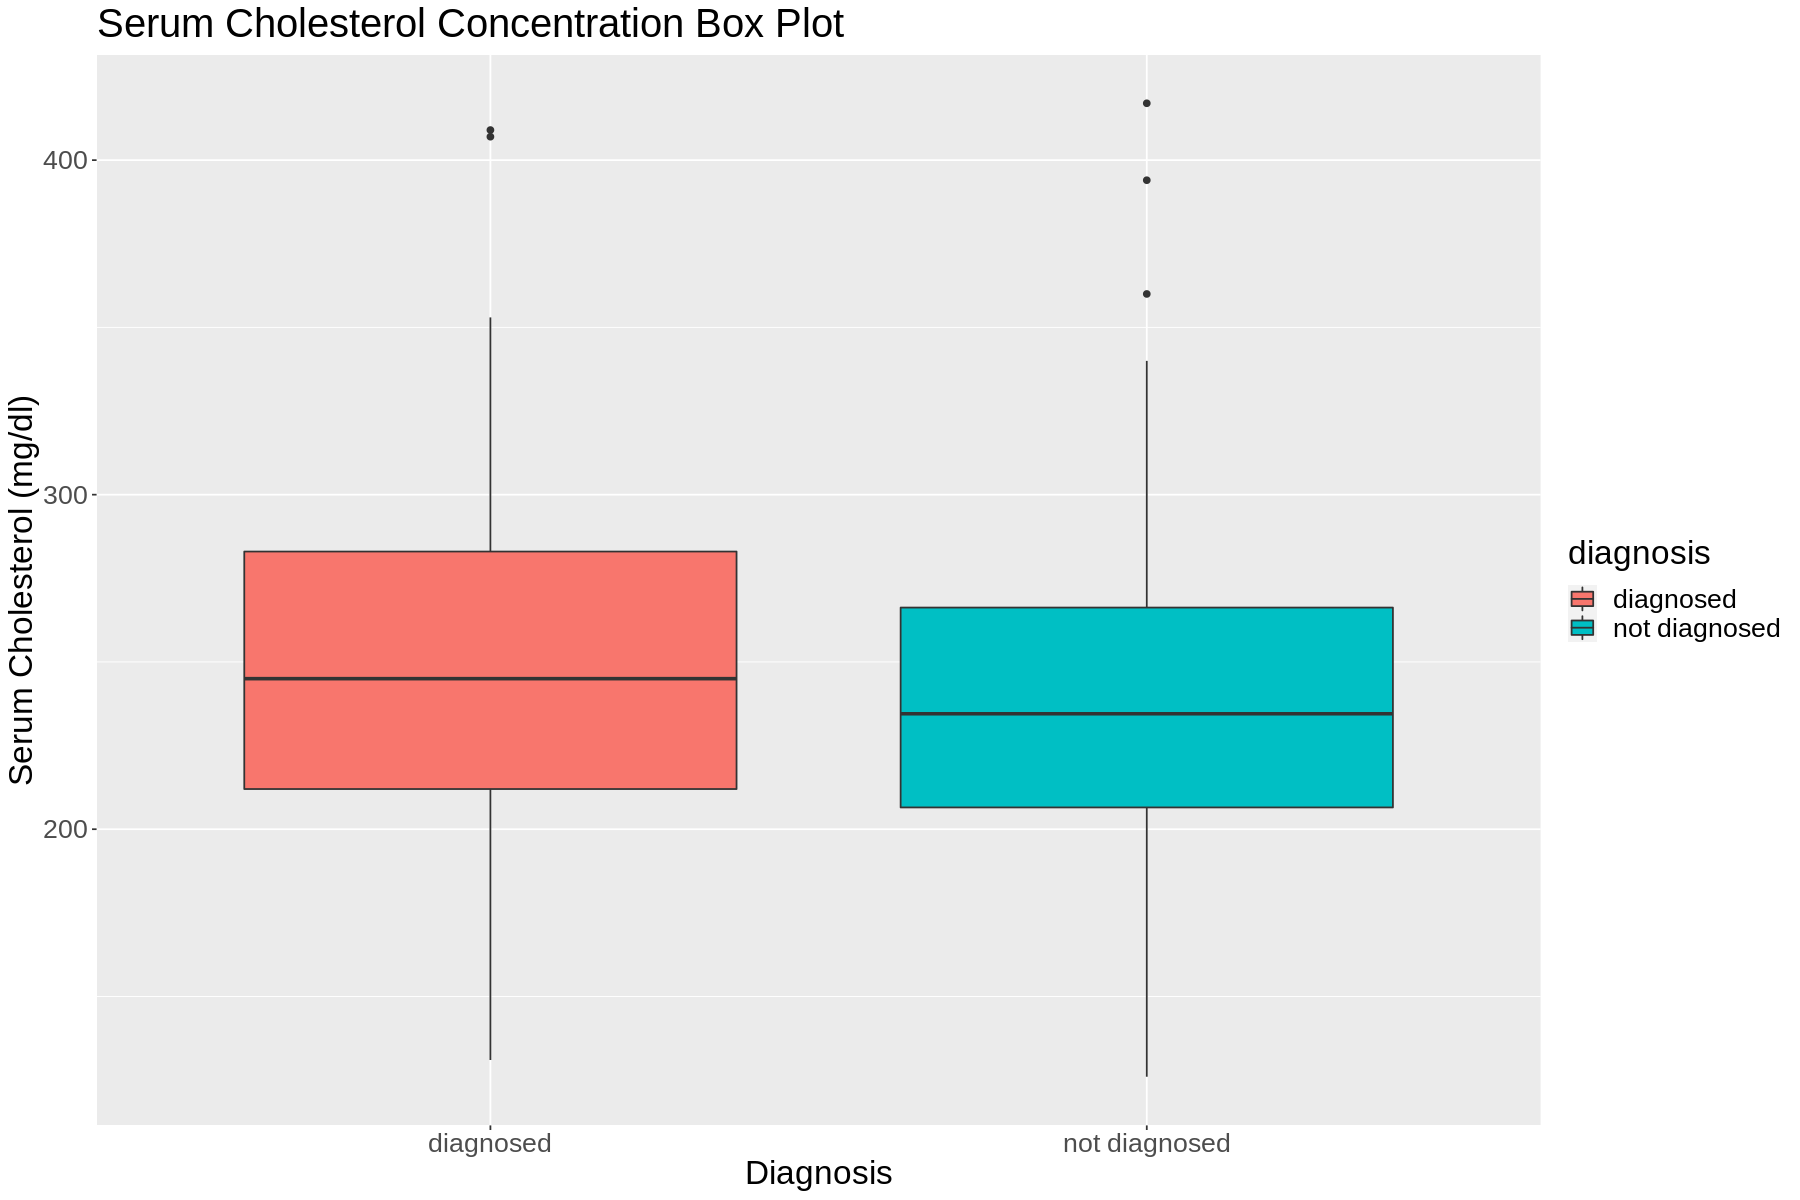

In [7]:
chol_box <- cleveland_train |>
    ggplot(aes(x = diagnosis, y = chol, fill = diagnosis)) +
    geom_boxplot() +
    labs(x = "Diagnosis", y = "Serum Cholesterol (mg/dl)",
         color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    ggtitle("Serum Cholesterol Concentration Box Plot")

chol_box

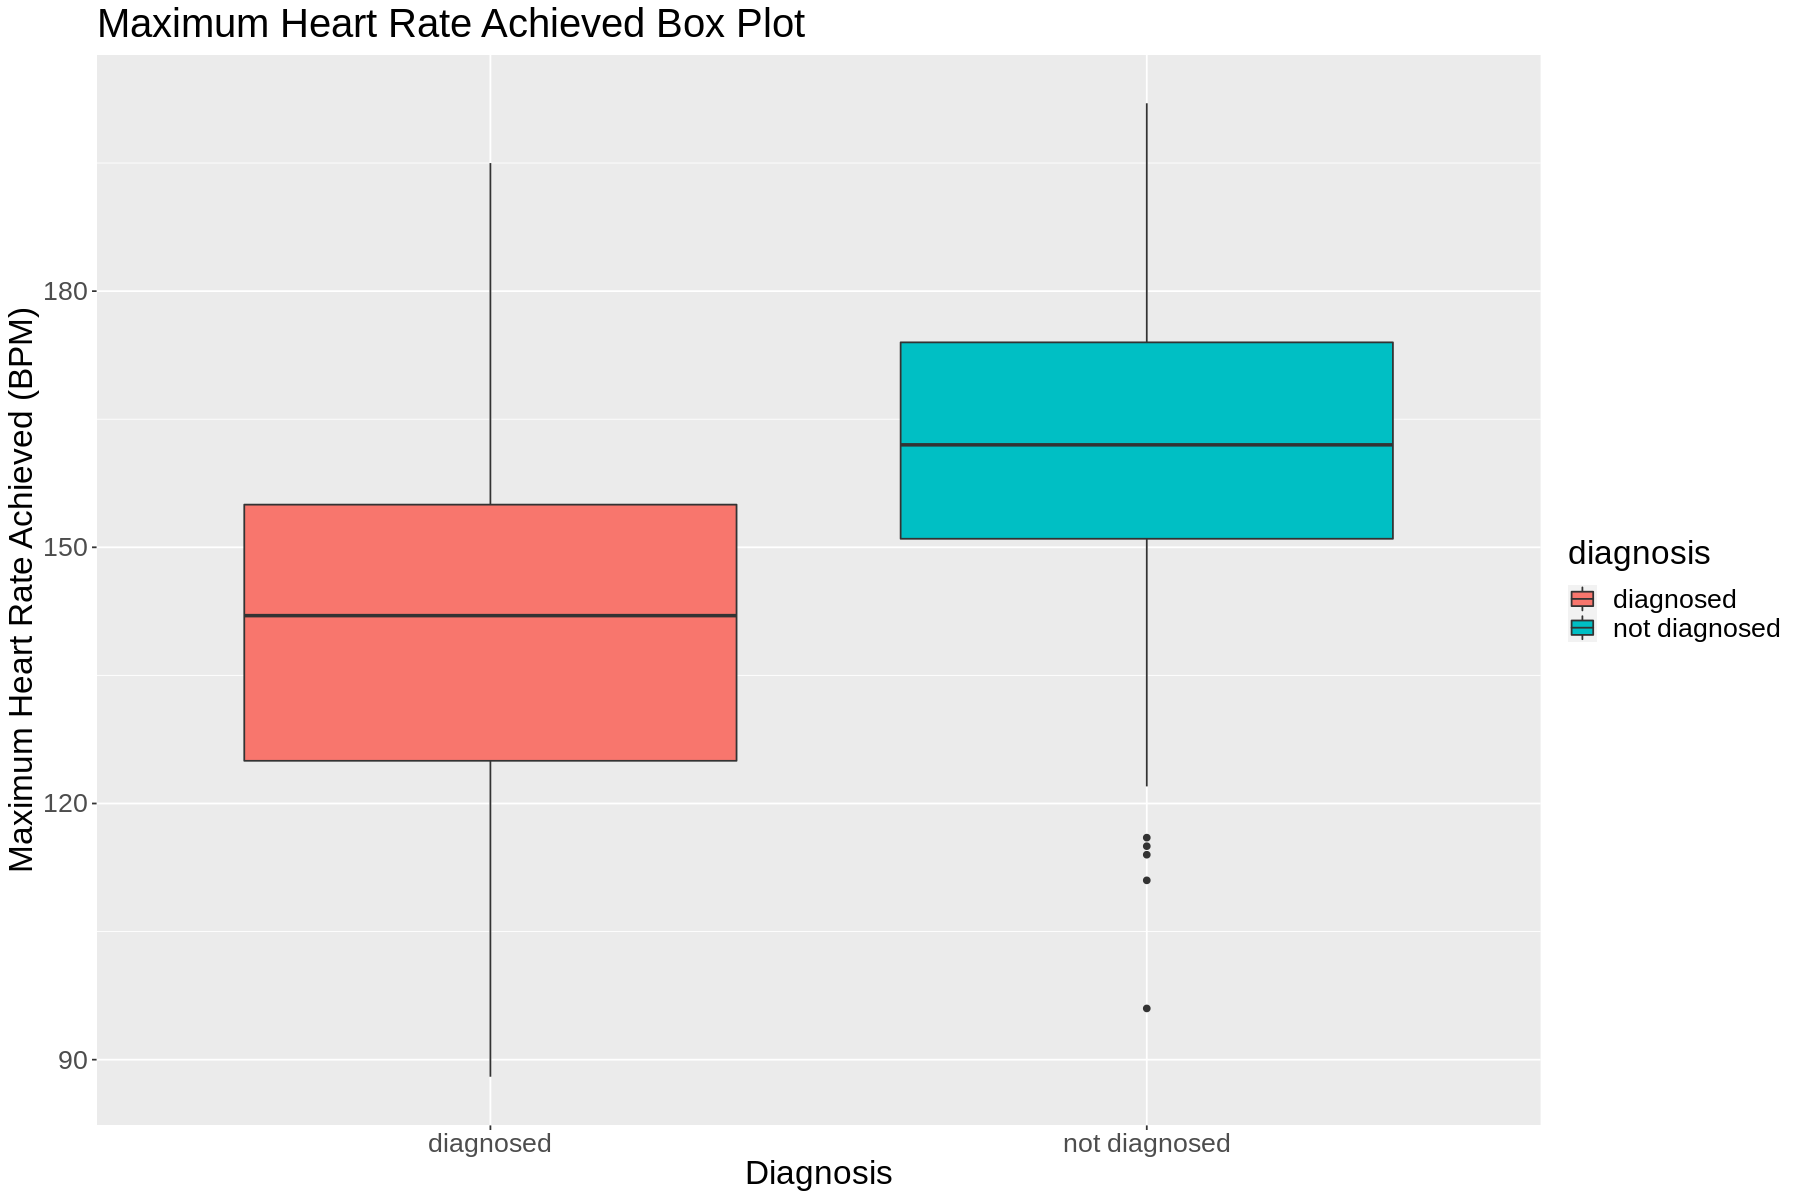

In [8]:
thalach_box <- cleveland_train |>
    ggplot(aes(x = diagnosis, y = thalach, fill = diagnosis)) +
    geom_boxplot() +
    labs(x = "Diagnosis", y = "Maximum Heart Rate Achieved (BPM)",
         color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    ggtitle("Maximum Heart Rate Achieved Box Plot")

thalach_box

Creating a barplot to visualize the number of people diagnosed with heart disease, we can see that in our training set there is slightly more people diagnosed with heart disease. However, this small difference should not mess up clustering too greatly.

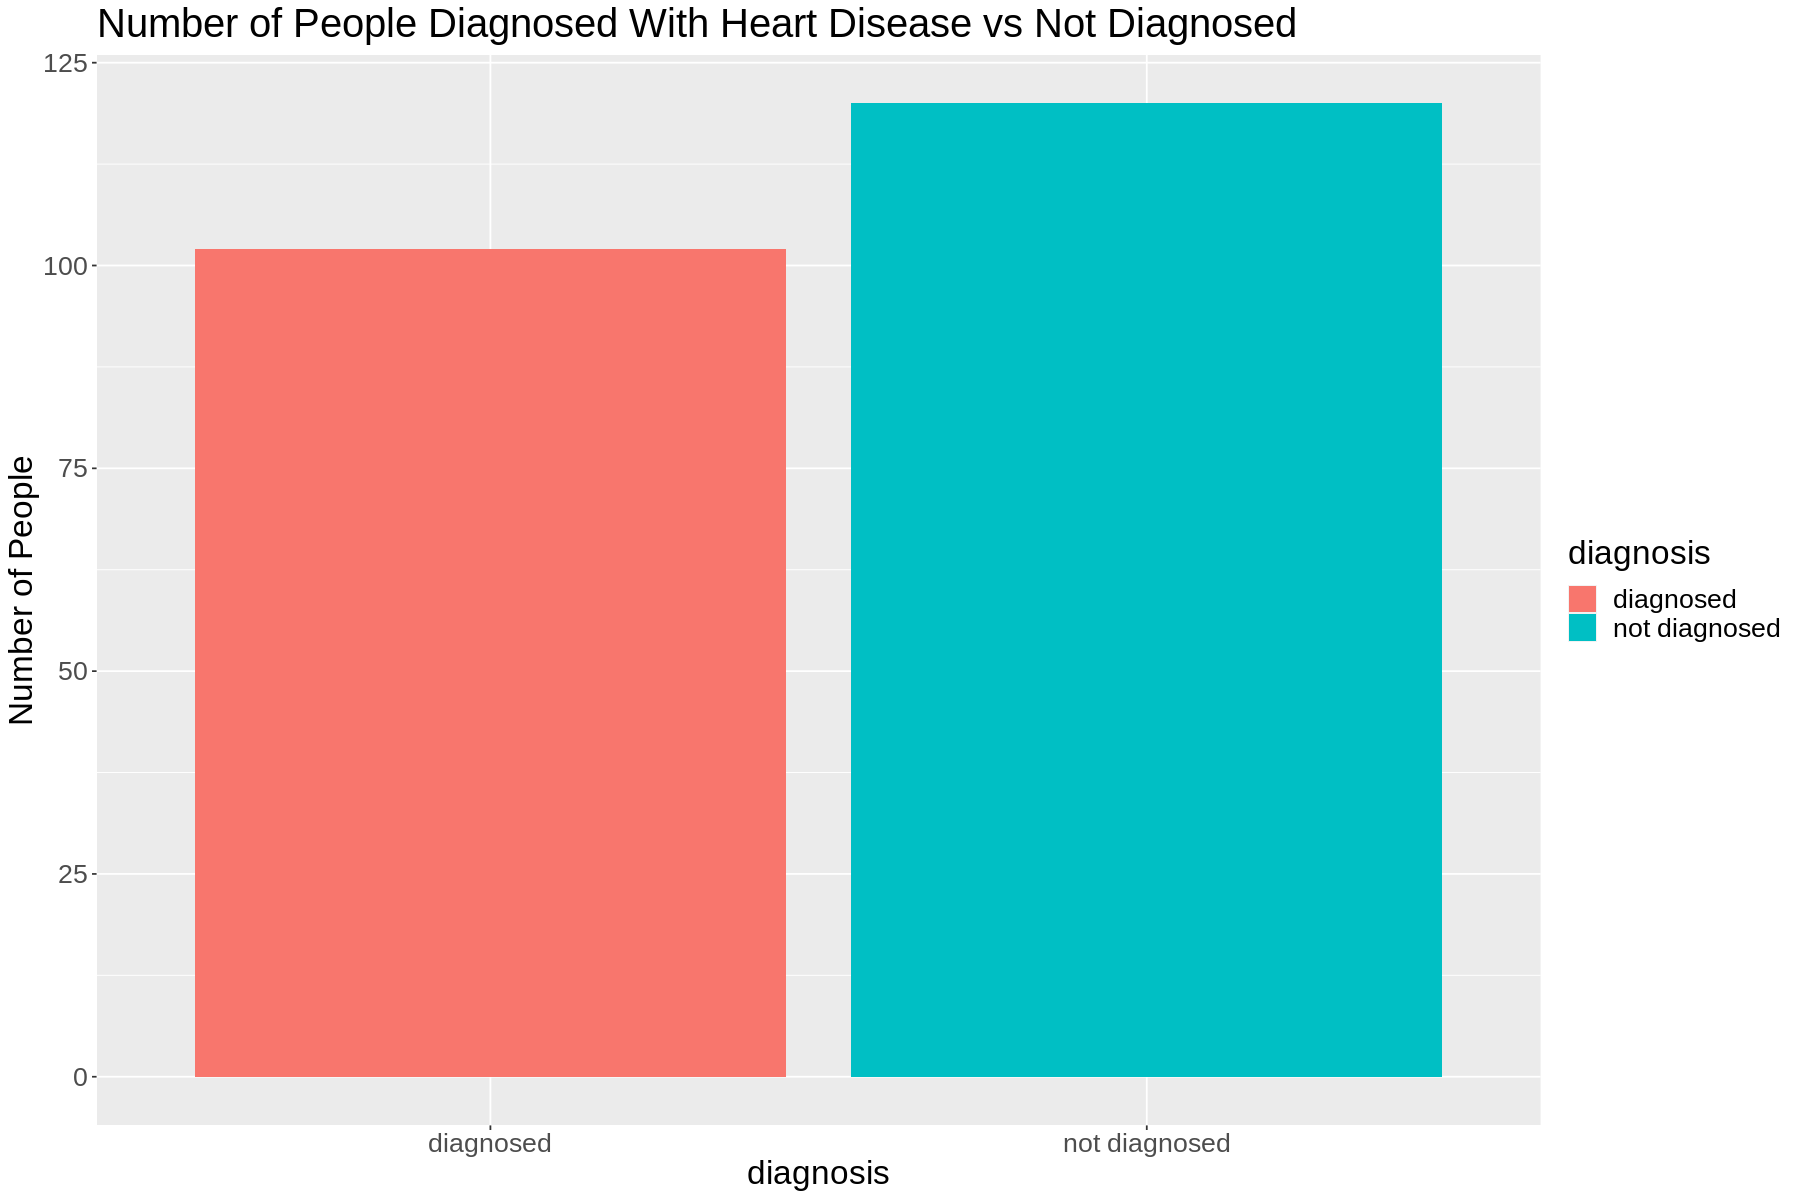

In [18]:
heart_disease_bar <- cleveland_train |>
    ggplot(aes(x = diagnosis, fill = diagnosis)) +
    geom_bar()+
    labs(y = "Number of People") +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of People Diagnosed With Heart Disease vs Not Diagnosed")

heart_disease_bar

**Methods:**
We plan to use age, maximum heart rate, and serum cholesterol as our predictors to classify whether a patient is going to be diagnosed with heart disease. We will standardize all numerical values while making the recipe, and use the k-nearest neighbours algorithm for classification. We will use cross validation and select the amount of neighbours that will produce the most accurate results. Lastly, we will evaluate the accuracy of our models by comparing our predictions to the actual values with the metrics function. We will visualize the data by creating a scatter plot of the predictors on the axes, coloured by the diagnosis of heart disease, to visualize the relationship between the predictors and the diagnosis of heart disease. 


We will create a recipe, and we will be using age, serum cholesterol concentration, and maximum heart rate achieved as our predictors for classifying whether or not an individual is diagnosed with heart disease. Since our algorithm depends on distances between observations, we should scale our data to avoid one variable overpowering the other in distance calculations. 

In [10]:
heart_recipe <- recipe(diagnosis ~ age + chol + thalach, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 


We will be using the k-nearest neighbours algorithm for classification. We will tune our model and perform cross-validation to see how many models we should use to yield results with highest accuracy. 

In [11]:
set.seed(1234)
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_vfold <- vfold_cv(cleveland_train, v = 5, strata = diagnosis) 

k = tibble(neighbors = seq(from = 1, to = 35, by = 1)) 

heart_test_k <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_tune) |>
    tune_grid(resamples = heart_vfold, grid = k) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
head(heart_test_k)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6258586,5,0.04245231,Preprocessor1_Model01
2,accuracy,binary,0.6258586,5,0.04245231,Preprocessor1_Model02
3,accuracy,binary,0.6574747,5,0.03295330,Preprocessor1_Model03
4,accuracy,binary,0.6574747,5,0.03295330,Preprocessor1_Model04
5,accuracy,binary,0.6570707,5,0.04824197,Preprocessor1_Model05
6,accuracy,binary,0.6570707,5,0.04824197,Preprocessor1_Model06


Create a plot to visualize which k will yield in the highest mean of accuracy. 

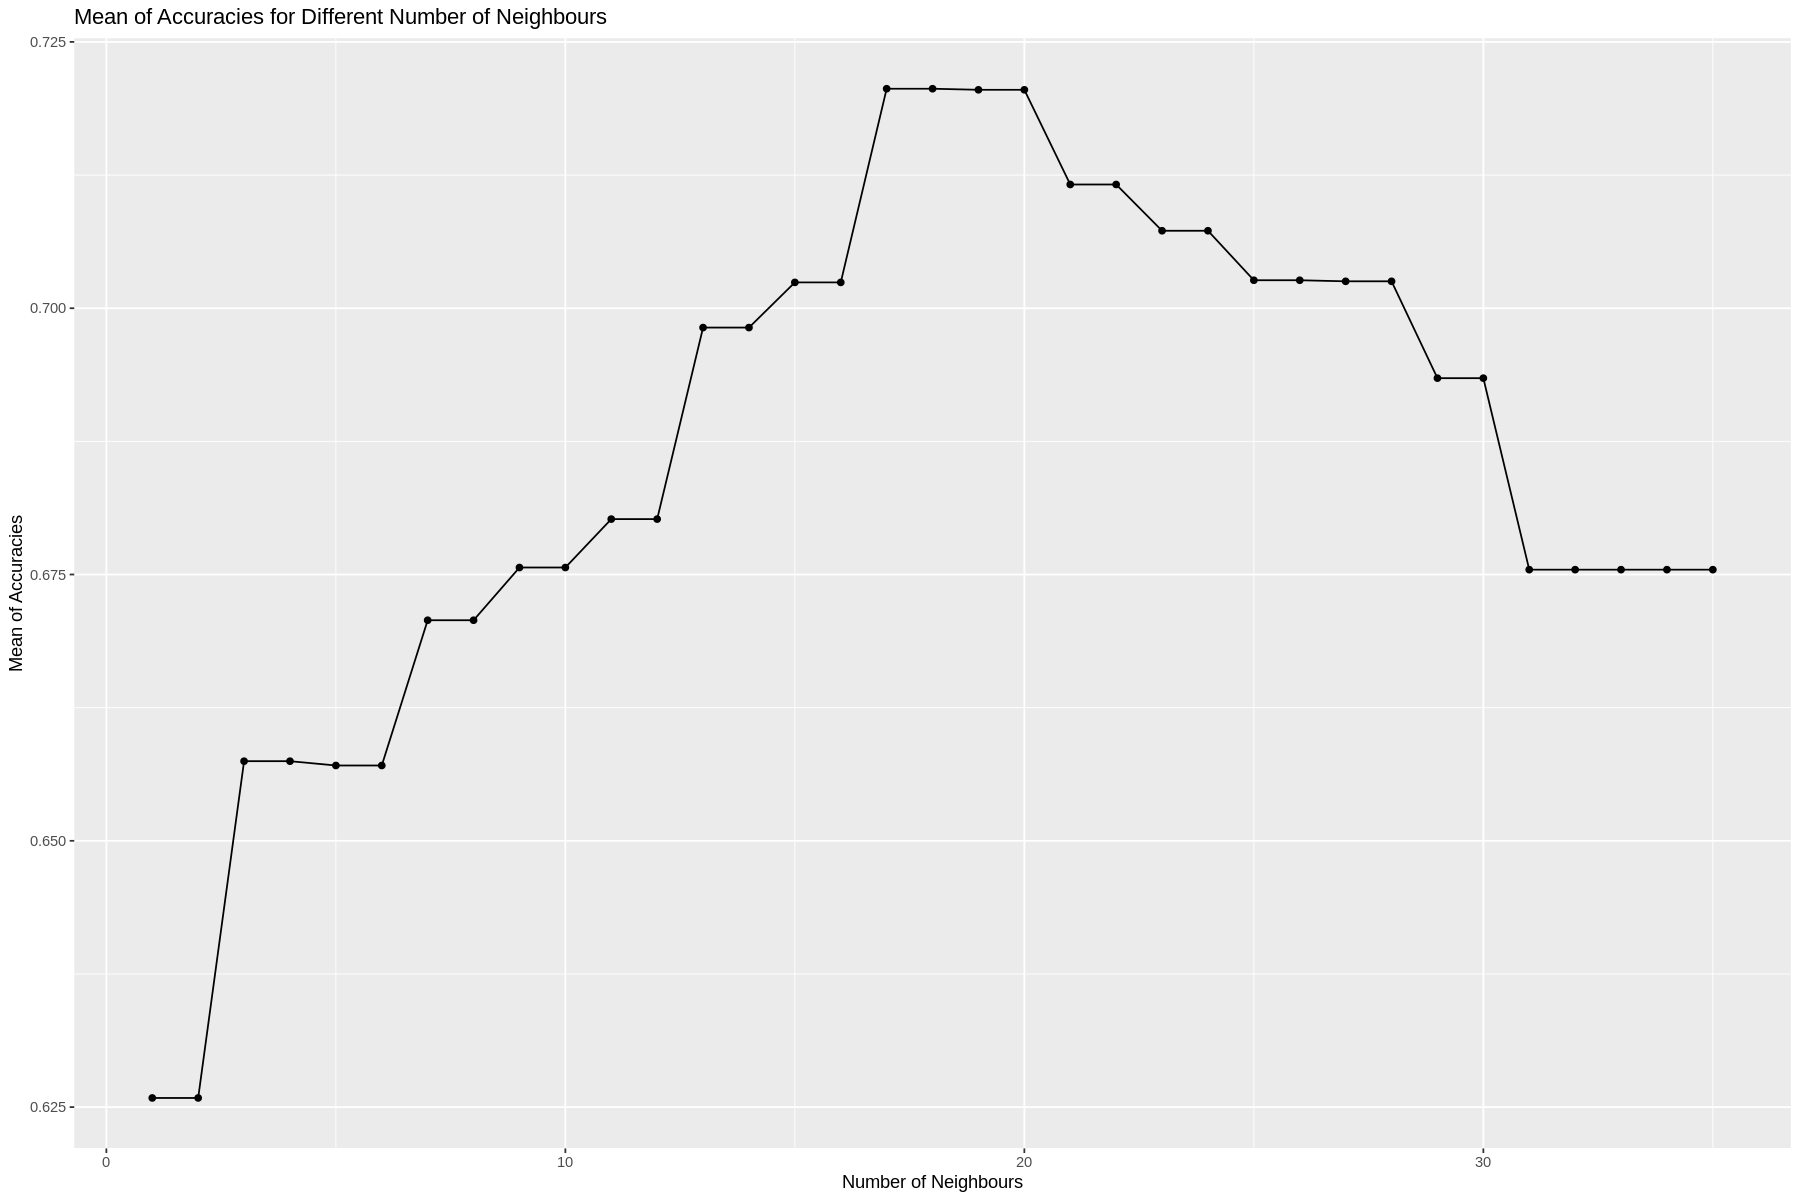

In [12]:
heart_test_k_plot <- heart_test_k|>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Neighbours", y = "Mean of Accuracies") +
    ggtitle("Mean of Accuracies for Different Number of Neighbours")

heart_test_k_plot

According to the plot, we can see the amount of nearest neighbours that yields the highest means is between 17 to 20 nearest neighbours. To be extra sure, we can obtain it from the metrics. 

In [13]:
best_k <- heart_test_k |>
    arrange(desc(mean)) |>
    slice(1) |>
    select(neighbors) |>
    pull() 
best_k

[1] 17

Create a model with the number of neighbours that is expected to give the most accurate results. Combine into a workflow and fit the training set. Make predictions on the testing set based on our model. 

In [19]:
heart_best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_best_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_best_model) |>
    fit(cleveland_train)

heart_predictions <- heart_best_fit |>
    predict(cleveland_test) |>
    bind_cols(cleveland_test) |>
    mutate(diagnosis = as.factor(diagnosis))

head(heart_predictions)

.pred_class,diagnosis,age,chol,thalach
<fct>,<fct>,<dbl>,<dbl>,<dbl>
not diagnosed,not diagnosed,57,354,163
not diagnosed,diagnosed,48,229,168
diagnosed,not diagnosed,64,211,144
not diagnosed,not diagnosed,50,219,158
diagnosed,diagnosed,57,276,112
not diagnosed,diagnosed,61,330,169


In [15]:
heart_metrics <- heart_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class)

heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6133333
kap,binary,0.2300885


In [16]:
heart_conf_mat <- heart_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
heart_conf_mat

               Truth
Prediction      diagnosed not diagnosed
  diagnosed            23            17
  not diagnosed        12            23

**Expected Outcomes and Significance:**

It is expected that both maximum heart rate achieved and serum cholesterol concentration will change with respect to age, and there will be a correlation between them and a diagnosis of heart disease.

These findings can allow for a better understanding of how heart health, specifically the maximum heart rate achieved, changes in serum cholesterol and changes with age, can predict the likelihood of heart disease. 

These outcomes can lead to further investigations into what other factors such as lifestyle choices or genetic makeup can affect the likelihood of heart disease. 


**References:**
	
Law, M., Wald, N. J., & Thompson, S. E. (1994). By how much and how quickly does reduction in serum cholesterol concentration lower risk of ischaemic heart disease? BMJ, 308(6925), 367–372. https://doi.org/10.1136/bmj.308.6925.367


Pepine, C. J.; Abrams, J.; Marks, R. G.; Morris, J. J.; Scheidt, S. S.; Handberg, E.; The TIDES Investigators. Characteristics of a Contemporary Population with Angina Pectoris. The American Journal of Cardiology 1994, 74 (3), 226–231. 
https://doi.org/10.1016/0002-9149(94)90361-1


Perret-Guillaume, C., Joly, L., & Benetos, A. (2009). Heart rate as a risk factor for cardiovascular disease. Progress in Cardiovascular Diseases, 52(1), 6–10. https://doi.org/10.1016/j.pcad.2009.05.003


Sandvik, L., Erikssen, J., Ellestad, M. H., Erikssen, G., Thaulow, E., Mundal, R., & Rodahl, K. (1995). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality. Coronary Artery Disease, 6(8), 667–680. https://doi.org/10.1097/00019501-199508000-00012


**Members:**
<br>
Jasleen Saini
<br>
Lily Liu
<br>
Allan Wang
<br>
Deeksha Yelamanchi
